<a href="https://colab.research.google.com/github/Tzutzu13/Final_Project2020/blob/master/data_augmentation_rotation_500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

11493376/11490434 [==============================] - 0s 0us/step






Epoch 1/300





1100/1100 [==============================] - 10s 9ms/step - loss: 0.1058
Epoch 2/300
1100/1100 [==============================] - 0s 36us/step - loss: 0.1015
Epoch 3/300
1100/1100 [==============================] - 0s 34us/step - loss: 0.0948
Epoch 4/300
1100/1100 [==============================] - 0s 34us/step - loss: 0.0873
Epoch 5/300
1100/1100 [==============================] - 0s 33us/step - loss: 0.0794
Epoch 6/300
1100/1100 [==============================] - 0s 32us/step - loss: 0.0712
Epoch 7/300
1100/1100 [==============================] - 0s 29us/step - loss: 0.0663
Epoch 8/300
1100/1100 [==============================] - 0s 31us/step - loss: 0.0641
Epoch 9/300
1100/1100 [==============================] - 0s 32us/step - loss: 0.0639
Epoch 10/300
1100/1100 [==============================] - 0s 29us/step - loss: 0.0639
Epoch 11/300
1100/1100 [==============================] - 0s 29us/step - 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 140: acc = 0.58636, nmi = 0.55124, ari = 0.43157  ; loss= [0.01067 0.03369 0.0073 ]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 280: acc = 0.59182, nmi = 0.55313, ari = 0.44016  ; loss= [0.01588 0.06577 0.0093 ]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 420: acc = 0.58818, nmi = 0.55662, ari = 0.44024  ; loss= [0.02074 0.09374 0.01137]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 560: acc = 0.58818, nmi = 0.55662, ari = 0.44024  ; loss= [0.01881 0.09235 0.00957]
delta_label  0.0 < tol  0.001
Reached tolerance threshold. Stopping training.
Acc = 0.58818, nmi = 0.55662, ari = 0.44024  ; loss= [0.01881 0.09235 0.00957]
Labels     A    B   C   D   E   F   G   H   I   J
Clusters                                         
0          0    7   0   0  12   7   0  10  49  42
1         91    0   4   3   0   2   2   0   0   0
2          0    0   0   2  37   0   0  36   4  63
3          0    0   0   0  42   0   0  59   0  14
4          4    2   8   0   3   3  90   0   0   0
5          6    2  13  45   0  23   2   0  14   6
6          7    3  12   0   2  43   0   4   3   0
7          0    0  57   0  18   0   0   0   0   0
8          0    0   7  61   0   5   0   0   2   0
9          0  134   8   0   4   5   5   2  11   0


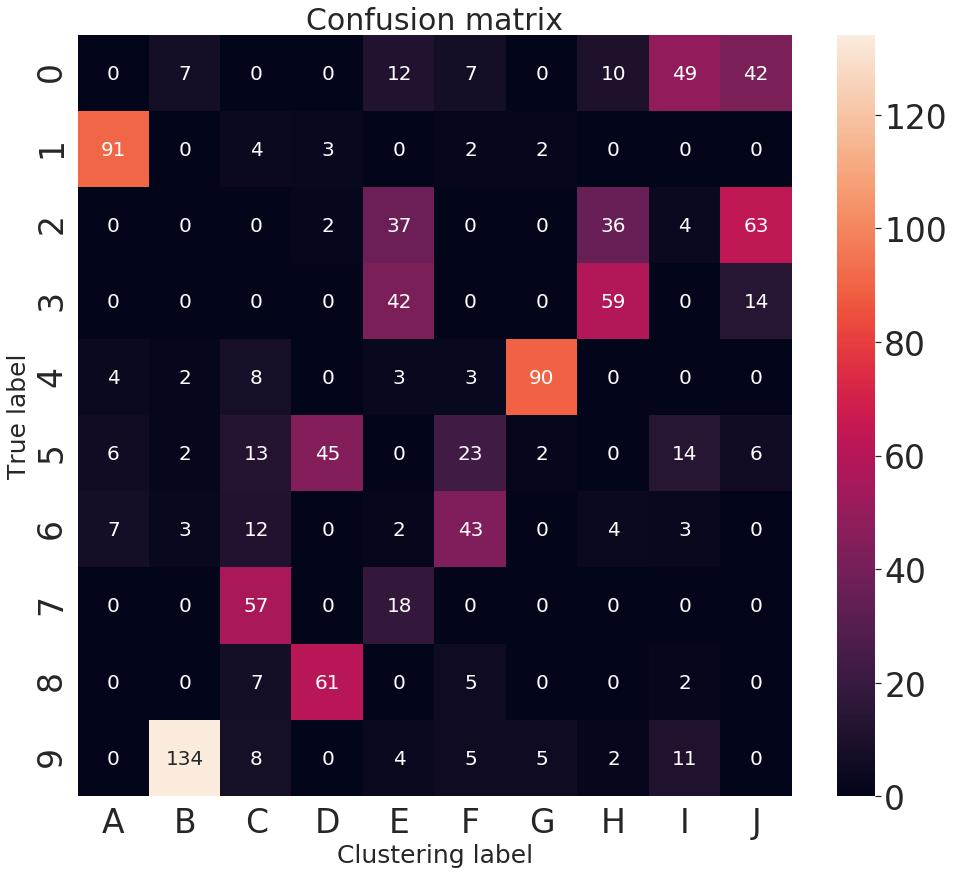

Time:  31.222505388999934


In [5]:
import timeit

start = timeit.default_timer()
from keras.datasets import mnist
import numpy as np
np.random.seed(10)
from time import time
from keras.engine.topology import Layer, InputSpec
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
import metrics
import keras.backend as K
import seaborn as sns
import sklearn.metrics
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator


#x_train = []
#x_train = np.zeros(1942,np.size(Data_Syllables[1]))
#for i in range(1,len(Data_Syllables)):
#    x_train.append(Data_Syllables[i])
    
#x = np.asarray(x_train, dtype=np.uint8)

#(x_train, y_train), (x_test, y_test) = Data_syllables

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x = np.concatenate((x_train, x_test))[0:500]
y = np.concatenate((y_train, y_test))[0:500]
# moshe = m.x_train.reshape((x.shape[0], -1))
x = x.reshape((x.shape[0], -1))
x = np.divide(x, 255.)
#n_clusters = len(np.unique(y))
n_clusters = 10
x.shape
# X_train = x.reshape(-1, 28, 28).astype('float32')
# images_and_labels = list(zip(X_train,  y))
# for index, (image, label) in enumerate(images_and_labels[:20]):
#     plt.subplot(5, 4, index + 1)
#     plt.axis('off')
#     plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
#     plt.title('label: %i' % label)

X_train = x.reshape(-1,28,28,1)
result_x = np.array(X_train)
result_y = y
x_train2 = np.array(result_x, copy=True) 
y_train2 = np.array(result_y, copy=True) 

datagen = ImageDataGenerator(rotation_range=10)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)

datagen.fit(result_x)
for x_batch, y_batch in datagen.flow(x_train2,y_train2,batch_size=10):
    x_train2 = np.concatenate((x_train2, x_batch))
    y_train2 = np.concatenate((y_train2, y_batch))
    if x_train2.shape[0]>=600:
        break
result_x  = np.concatenate((result_x, x_train2), axis=0)
result_y  = np.concatenate((result_y, y_train2), axis=0)

x = result_x
x = x.reshape((x.shape[0], -1))

y = result_y
dims = [x.shape[-1], 500, 500, 2000, 10]
init = VarianceScaling(scale=1. / 3., mode='fan_in',distribution='uniform')
input_dim = 10
pretrain_optimizer = SGD(lr=1, momentum=0.9)
pretrain_epochs = 300
batch_size = 256
loss = 0
index = 0
maxiter = 8000
update_interval = 140
index_array = np.arange(x.shape[0])
tol = 0.001 # tolerance threshold to stop training

class ClusteringLayer(Layer):
    """
    Clustering layer converts input sample (feature) to soft label, i.e. a vector that represents the probability of the
    sample belonging to each cluster. The probability is calculated with student's t-distribution.

    # Example
    ```
        model.add(ClusteringLayer(n_clusters=10))
    ```
    # Arguments
        n_clusters: number of clusters.
        weights: list of Numpy array with shape `(n_clusters, n_features)` witch represents the initial cluster centers.
        alpha: degrees of freedom parameter in Student's t-distribution. Default to 1.0.
    # Input shape
        2D tensor with shape: `(n_samples, n_features)`.
    # Output shape
        2D tensor with shape: `(n_samples, n_clusters)`.
    """

    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight(shape=(self.n_clusters, input_dim), initializer='glorot_uniform', name='clusters')
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):
        """ student t-distribution, as same as used in t-SNE algorithm.
         Measure the similarity between embedded point z_i and centroid µ_j.
                 q_ij = 1/(1+dist(x_i, µ_j)^2), then normalize it.
                 q_ij can be interpreted as the probability of assigning sample i to cluster j.
                 (i.e., a soft assignment)
        Arguments:
            inputs: the variable containing data, shape=(n_samples, n_features)
        Return:
            q: student's t-distribution, or soft labels for each sample. shape=(n_samples, n_clusters)
        """
        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1)) # Make sure each sample's 10 values add up to 1.
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))
    
def autoencoder(dims, act='relu', init='glorot_uniform'):
    """
    Fully connected auto-encoder model, symmetric.
    Arguments:
        dims: list of number of units in each layer of encoder. dims[0] is input dim, dims[-1] is units in hidden layer.
            The decoder is symmetric with encoder. So number of layers of the auto-encoder is 2*len(dims)-1
        act: activation, not applied to Input, Hidden and Output layers
    return:
        (ae_model, encoder_model), Model of autoencoder and model of encoder
    """
    n_stacks = len(dims) - 1
    # input
    input_img = Input(shape=(dims[0],), name='input')
    x = input_img
    # internal layers in encoder
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(x)

    # hidden layer
    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(x)  # hidden layer, features are extracted from here

    x = encoded
    # internal layers in decoder
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(x)

    # output
    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)
    decoded = x
    return Model(inputs=input_img, outputs=decoded, name='AE'), Model(inputs=input_img, outputs=encoded, name='encoder')
autoencoder, encoder = autoencoder(dims, init=init)
autoencoder.compile(optimizer=pretrain_optimizer, loss='mse')
autoencoder.fit(x, x, batch_size=batch_size, epochs=300) #, callbacks=cb)
autoencoder.save_weights('ae_weights'+'16000AUGMENT'+'seed.h5')
autoencoder.load_weights('ae_weights'+'16000AUGMENT'+'seed.h5')
clustering_layer = ClusteringLayer(n_clusters, name='clustering')(encoder.output)
model = Model(inputs=encoder.input,
            outputs=[clustering_layer, autoencoder.output])

# Initialize cluster centers using k-means
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoder.predict(x))
model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])
y_pred_last = np.copy(y_pred)
model.compile(loss=['kld', 'mse'], loss_weights=[0.1, 1], optimizer=pretrain_optimizer)

# computing an auxiliary target distribution
def target_distribution(q):
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

for ite in range(int(maxiter)):
    if ite % update_interval == 0:
        q, _  = model.predict(x, verbose=0)
        p = target_distribution(q)  # update the auxiliary target distribution p

        # evaluate the clustering performance
        y_pred = q.argmax(1)
        if y is not None:
            acc = np.round(metrics.acc(y, y_pred), 5)
            nmi = np.round(metrics.nmi(y, y_pred), 5)
            ari = np.round(metrics.ari(y, y_pred), 5)
            loss = np.round(loss, 5)
            print('Iter %d: acc = %.5f, nmi = %.5f, ari = %.5f' % (ite, acc, nmi, ari), ' ; loss=', loss)

        # check stop criterion
        delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
        y_pred_last = np.copy(y_pred)
        if ite > 0 and delta_label < tol:
            print('delta_label ', delta_label, '< tol ', tol)
            print('Reached tolerance threshold. Stopping training.')
            break
    idx = index_array[index * batch_size: min((index+1) * batch_size, x.shape[0])]
    loss = model.train_on_batch(x=x[idx], y=[p[idx], x[idx]])
    index = index + 1 if (index + 1) * batch_size <= x.shape[0] else 0

model.save_weights('b_DEC_model_final'+'16000AUGMENT'+'seed.h5')
model.load_weights('b_DEC_model_final'+'16000AUGMENT'+'seed.h5')

# Eval.
q, _ = model.predict(x, verbose=0)
p = target_distribution(q)  # update the auxiliary target distribution p

# evaluate the clustering performance
y_pred = q.argmax(1)
if y is not None:
    acc = np.round(metrics.acc(y, y_pred), 5)
    nmi = np.round(metrics.nmi(y, y_pred), 5)
    ari = np.round(metrics.ari(y, y_pred), 5)
    loss = np.round(loss, 5)
    print('Acc = %.5f, nmi = %.5f, ari = %.5f' % (acc, nmi, ari), ' ; loss=', loss)


sns.set(font_scale=3)
# labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
confusion_matrix = sklearn.metrics.confusion_matrix(y, y_pred)

z = list(y_pred)

z1 = y.astype(str)
for i in range(len(y_pred)):
    if y[i] == 0:
        z1[i] = 'A'
    elif y[i] == 1:
        z1[i] = 'B'
    elif y[i] == 2:
        z1[i] = 'C'
    elif y[i] == 3:
        z1[i] = 'D'
    elif y[i] == 4:
        z1[i] = 'E'
    elif y[i] == 5:
        z1[i] = 'F'
    elif y[i] == 6:
        z1[i] = 'G'
    elif y[i] == 7:
        z1[i] = 'H'
    elif y[i] == 8:
        z1[i] = 'I'        
    elif y[i] == 9:
        z1[i] = 'J'
z1 = list(z1)
        
labels =  z1
pred = z
df = pd.DataFrame({'Labels': labels, 'Clusters': pred})

# Create crosstab: ct
ct = pd.crosstab(df['Clusters'],df['Labels'])

# Display ct
print(ct)
    
plt.figure(figsize=(16, 14))
sns.heatmap(ct, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

stop = timeit.default_timer()

print('Time: ', stop - start)

Epoch 1/300
500/500 [==============================] - 0s 664us/step - loss: 0.1075
Epoch 2/300
500/500 [==============================] - 0s 35us/step - loss: 0.1066
Epoch 3/300
500/500 [==============================] - 0s 36us/step - loss: 0.1050
Epoch 4/300
500/500 [==============================] - 0s 35us/step - loss: 0.1028
Epoch 5/300
500/500 [==============================] - 0s 35us/step - loss: 0.1003
Epoch 6/300
500/500 [==============================] - 0s 36us/step - loss: 0.0974
Epoch 7/300
500/500 [==============================] - 0s 35us/step - loss: 0.0944
Epoch 8/300
500/500 [==============================] - 0s 35us/step - loss: 0.0913
Epoch 9/300
500/500 [==============================] - 0s 38us/step - loss: 0.0882
Epoch 10/300
500/500 [==============================] - 0s 38us/step - loss: 0.0849
Epoch 11/300
500/500 [==============================] - 0s 34us/step - loss: 0.0815
Epoch 12/300
500/500 [==============================] - 0s 35us/step - loss: 0.0781


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 0: acc = 0.52200, nmi = 0.52627, ari = 0.34461  ; loss= 0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 140: acc = 0.52600, nmi = 0.52946, ari = 0.35207  ; loss= [0.03165 0.04817 0.02683]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 280: acc = 0.53000, nmi = 0.53535, ari = 0.35806  ; loss= [0.03617 0.10012 0.02616]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 420: acc = 0.53000, nmi = 0.53590, ari = 0.36082  ; loss= [0.03579 0.11741 0.02405]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 560: acc = 0.53000, nmi = 0.53590, ari = 0.36082  ; loss= [0.03536 0.11687 0.02367]
delta_label  0.0 < tol  0.001
Reached tolerance threshold. Stopping training.
Acc = 0.53000, nmi = 0.53590, ari = 0.36082  ; loss= [0.03536 0.11687 0.02367]
Labels     A   B   C   D   E   F   G   H   I   J
Clusters                                        
0          0   1   0  20   0   4   0   0  25   1
1          1  17   6   0   6  21   3   4   4   2
2          0   0   0   0  29   0   0  31   0  29
3          2   0   6  24   0  11   0   0   5   2
4          1   0   4   0   2   1  38   0   0   0
5         19   0   0   0   1   1   1   0   0   0
6          0   0  34   0   0   0   0   0   0   0
7          0  47   2   0   2   0   1   8   3   4
8          0   1   0   6  12   0   2   9   2  17
9         27   0   0   0   0   1   0   0   0   0


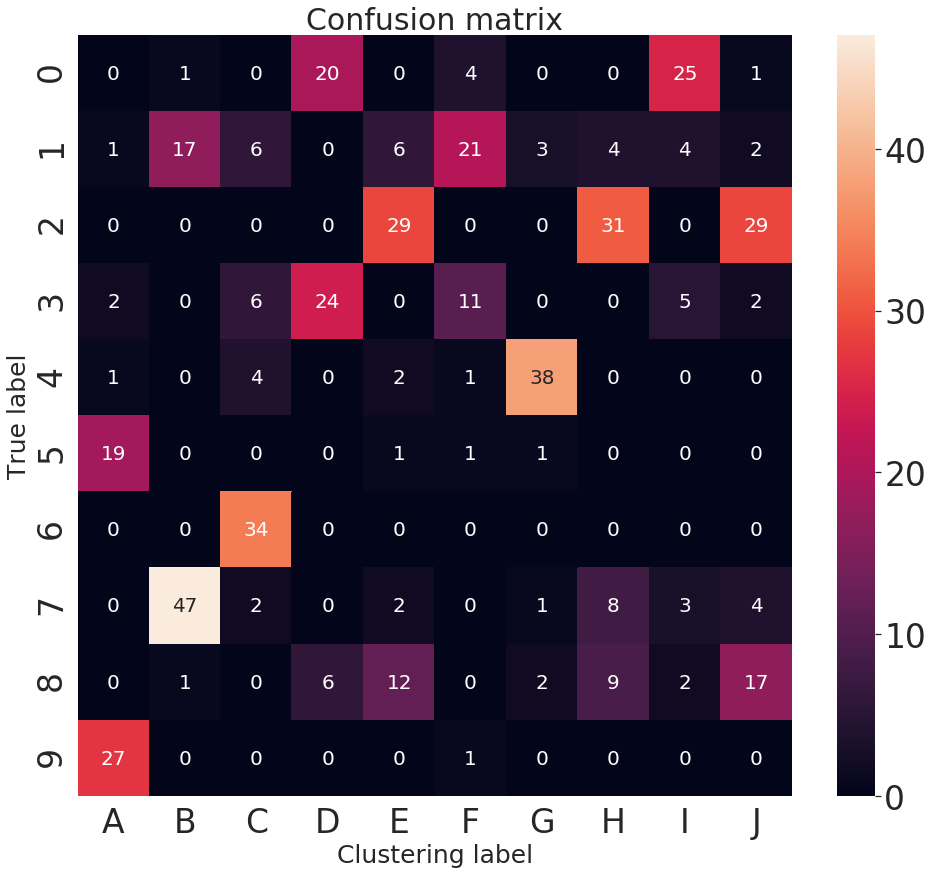

Time:  12.862659168999926


In [3]:
import timeit

start = timeit.default_timer()
from keras.datasets import mnist
import numpy as np
np.random.seed(10)
from time import time
from keras.engine.topology import Layer, InputSpec
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
import metrics
import keras.backend as K
import seaborn as sns
import sklearn.metrics
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator


#x_train = []
#x_train = np.zeros(1942,np.size(Data_Syllables[1]))
#for i in range(1,len(Data_Syllables)):
#    x_train.append(Data_Syllables[i])
    
#x = np.asarray(x_train, dtype=np.uint8)

#(x_train, y_train), (x_test, y_test) = Data_syllables

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x = np.concatenate((x_train, x_test))[0:500]
y = np.concatenate((y_train, y_test))[0:500]
# moshe = m.x_train.reshape((x.shape[0], -1))
x = x.reshape((x.shape[0], -1))
x = np.divide(x, 255.)
#n_clusters = len(np.unique(y))
n_clusters = 10
x.shape
# X_train = x.reshape(-1, 28, 28).astype('float32')
# images_and_labels = list(zip(X_train,  y))
# for index, (image, label) in enumerate(images_and_labels[:20]):
#     plt.subplot(5, 4, index + 1)
#     plt.axis('off')
#     plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
#     plt.title('label: %i' % label)

# X_train = x.reshape(-1,28,28,1)
# from keras.preprocessing.image import ImageDataGenerator
# result_x = np.array(X_train)
# result_y = y
# x_train2 = np.array(result_x, copy=True) 
# y_train2 = np.array(result_y, copy=True) 

# datagen = ImageDataGenerator(rotation_range=10)
# # compute quantities required for featurewise normalization
# # (std, mean, and principal components if ZCA whitening is applied)

# datagen.fit(result_x)
# for x_batch, y_batch in datagen.flow(x_train2,y_train2,batch_size=10):
#     x_train2 = np.concatenate((x_train2, x_batch))
#     y_train2 = np.concatenate((y_train2, y_batch))
#     if x_train2.shape[0]>=550:
#         break
# result_x  = np.concatenate((result_x, x_train2), axis=0)
# result_y  = np.concatenate((result_y, y_train2), axis=0)

# x = result_x
# x = x.reshape((x.shape[0], -1))
# y = result_y

dims = [x.shape[-1], 500, 500, 2000, 10]
init = VarianceScaling(scale=1. / 3., mode='fan_in',distribution='uniform')
input_dim = 10
pretrain_optimizer = SGD(lr=1, momentum=0.9)
pretrain_epochs = 300
batch_size = 256
loss = 0
index = 0
maxiter = 8000
update_interval = 140
index_array = np.arange(x.shape[0])
tol = 0.001 # tolerance threshold to stop training

class ClusteringLayer(Layer):
    """
    Clustering layer converts input sample (feature) to soft label, i.e. a vector that represents the probability of the
    sample belonging to each cluster. The probability is calculated with student's t-distribution.

    # Example
    ```
        model.add(ClusteringLayer(n_clusters=10))
    ```
    # Arguments
        n_clusters: number of clusters.
        weights: list of Numpy array with shape `(n_clusters, n_features)` witch represents the initial cluster centers.
        alpha: degrees of freedom parameter in Student's t-distribution. Default to 1.0.
    # Input shape
        2D tensor with shape: `(n_samples, n_features)`.
    # Output shape
        2D tensor with shape: `(n_samples, n_clusters)`.
    """

    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight(shape=(self.n_clusters, input_dim), initializer='glorot_uniform', name='clusters')
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):
        """ student t-distribution, as same as used in t-SNE algorithm.
         Measure the similarity between embedded point z_i and centroid µ_j.
                 q_ij = 1/(1+dist(x_i, µ_j)^2), then normalize it.
                 q_ij can be interpreted as the probability of assigning sample i to cluster j.
                 (i.e., a soft assignment)
        Arguments:
            inputs: the variable containing data, shape=(n_samples, n_features)
        Return:
            q: student's t-distribution, or soft labels for each sample. shape=(n_samples, n_clusters)
        """
        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1)) # Make sure each sample's 10 values add up to 1.
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))
    
def autoencoder(dims, act='relu', init='glorot_uniform'):
    """
    Fully connected auto-encoder model, symmetric.
    Arguments:
        dims: list of number of units in each layer of encoder. dims[0] is input dim, dims[-1] is units in hidden layer.
            The decoder is symmetric with encoder. So number of layers of the auto-encoder is 2*len(dims)-1
        act: activation, not applied to Input, Hidden and Output layers
    return:
        (ae_model, encoder_model), Model of autoencoder and model of encoder
    """
    n_stacks = len(dims) - 1
    # input
    input_img = Input(shape=(dims[0],), name='input')
    x = input_img
    # internal layers in encoder
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(x)

    # hidden layer
    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(x)  # hidden layer, features are extracted from here

    x = encoded
    # internal layers in decoder
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(x)

    # output
    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)
    decoded = x
    return Model(inputs=input_img, outputs=decoded, name='AE'), Model(inputs=input_img, outputs=encoded, name='encoder')
autoencoder, encoder = autoencoder(dims, init=init)
autoencoder.compile(optimizer=pretrain_optimizer, loss='mse')
autoencoder.fit(x, x, batch_size=batch_size, epochs=300) #, callbacks=cb)
autoencoder.save_weights('ae_weights'+'16000AUGMENT'+'seed.h5')
autoencoder.load_weights('ae_weights'+'16000AUGMENT'+'seed.h5')
clustering_layer = ClusteringLayer(n_clusters, name='clustering')(encoder.output)
model = Model(inputs=encoder.input,
            outputs=[clustering_layer, autoencoder.output])

# Initialize cluster centers using k-means
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoder.predict(x))
model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])
y_pred_last = np.copy(y_pred)
model.compile(loss=['kld', 'mse'], loss_weights=[0.1, 1], optimizer=pretrain_optimizer)

# computing an auxiliary target distribution
def target_distribution(q):
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

for ite in range(int(maxiter)):
    if ite % update_interval == 0:
        q, _  = model.predict(x, verbose=0)
        p = target_distribution(q)  # update the auxiliary target distribution p

        # evaluate the clustering performance
        y_pred = q.argmax(1)
        if y is not None:
            acc = np.round(metrics.acc(y, y_pred), 5)
            nmi = np.round(metrics.nmi(y, y_pred), 5)
            ari = np.round(metrics.ari(y, y_pred), 5)
            loss = np.round(loss, 5)
            print('Iter %d: acc = %.5f, nmi = %.5f, ari = %.5f' % (ite, acc, nmi, ari), ' ; loss=', loss)

        # check stop criterion
        delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
        y_pred_last = np.copy(y_pred)
        if ite > 0 and delta_label < tol:
            print('delta_label ', delta_label, '< tol ', tol)
            print('Reached tolerance threshold. Stopping training.')
            break
    idx = index_array[index * batch_size: min((index+1) * batch_size, x.shape[0])]
    loss = model.train_on_batch(x=x[idx], y=[p[idx], x[idx]])
    index = index + 1 if (index + 1) * batch_size <= x.shape[0] else 0

model.save_weights('b_DEC_model_final'+'16000AUGMENT'+'seed.h5')
model.load_weights('b_DEC_model_final'+'16000AUGMENT'+'seed.h5')

# Eval.
q, _ = model.predict(x, verbose=0)
p = target_distribution(q)  # update the auxiliary target distribution p

# evaluate the clustering performance
y_pred = q.argmax(1)
if y is not None:
    acc = np.round(metrics.acc(y, y_pred), 5)
    nmi = np.round(metrics.nmi(y, y_pred), 5)
    ari = np.round(metrics.ari(y, y_pred), 5)
    loss = np.round(loss, 5)
    print('Acc = %.5f, nmi = %.5f, ari = %.5f' % (acc, nmi, ari), ' ; loss=', loss)


sns.set(font_scale=3)
# labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
confusion_matrix = sklearn.metrics.confusion_matrix(y, y_pred)

z = list(y_pred)

z1 = y.astype(str)
for i in range(len(y_pred)):
    if y[i] == 0:
        z1[i] = 'A'
    elif y[i] == 1:
        z1[i] = 'B'
    elif y[i] == 2:
        z1[i] = 'C'
    elif y[i] == 3:
        z1[i] = 'D'
    elif y[i] == 4:
        z1[i] = 'E'
    elif y[i] == 5:
        z1[i] = 'F'
    elif y[i] == 6:
        z1[i] = 'G'
    elif y[i] == 7:
        z1[i] = 'H'
    elif y[i] == 8:
        z1[i] = 'I'        
    elif y[i] == 9:
        z1[i] = 'J'
z1 = list(z1)
        
labels =  z1
pred = z
df = pd.DataFrame({'Labels': labels, 'Clusters': pred})

# Create crosstab: ct
ct = pd.crosstab(df['Clusters'],df['Labels'])

# Display ct
print(ct)
    
plt.figure(figsize=(16, 14))
sns.heatmap(ct, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

stop = timeit.default_timer()

print('Time: ', stop - start)